# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

#### Import libraries and data 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pylab
sns.set_style()

df = pd.read_csv('data/human_body_temperature.csv')
temp = df['temperature']

### Test for Normal Distribution
1. Generate a histogram and a distribution plot 
2. Generate a Q-Q plot 

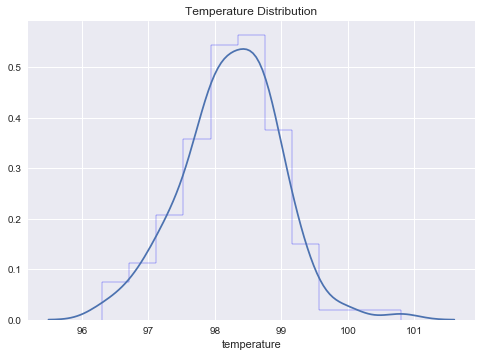

In [83]:
_ = plt.hist(temp, bins=11,normed=True, histtype='step', color='b')
_ = sns.distplot(temp, hist=False)
plt.title('Temperature Distribution')
plt.show()

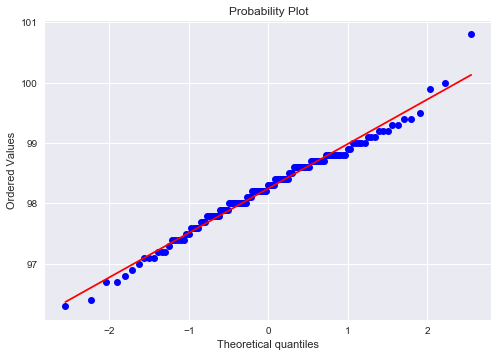

In [84]:
stats.probplot(temp, dist="norm", plot=pylab)
pylab.show()

#### Is the distribution of body temperatures normal? 
While both plots skew slightly towards the right, particuarly between 99 and 100, overall the two reveal that the distribution is close to normal.

### Sample Information


In [87]:
n = len(temp)
females = len(temp[df['gender'] == 'F'])
males = len(temp[df['gender'] == 'M'])
std = temp.std()
mean = temp.mean()
print('Number of observations: ' + str(n))
print('Number of females: ' + str(females))
print('Number of males: ' + str(males))
print('Mean: ' + str(round(mean, 2)))
print('Standard deviation: ' + str(round(std, 3)))

Number of observations: 130
Number of females: 65
Number of males: 65
Mean: 98.25
Standard deviation: 0.733


#### Is the sample size large? Are the observations independent? 
Yes, the sample size is much greater than 30, which is the requirement for the CLT. 
The observations appear to be independent based on the equal number of male and female samples and the approximately normal distribution of the entire sample. 

### True Population 

In [112]:
#I chose to do this the long way to solidify my understanding of the concept. 
ste = std/np.sqrt(n)
zscore = 1.65
conf = 1.65 * ste
assumed_mean_std = (98.6-mean)/ste
print('Mean: ' + str(round(mean, 2)))
print('Standard Error: ' + str(round(ste, 3)))
print('Z-score: ' + str(zscore))
print('95% Confidence interval: ' + 'between ' + str(round((mean - conf), 2)) + ' and ' + str(round((mean + conf), 2)))
print('98.6 deg is ' + str(round(assumed_mean_std, 3)) + ' standard errors from the sample/population mean')


Mean: 98.25
Standard Error: 0.064
Z-score: 1.65
95% Confidence interval: between 98.14 and 98.36
98.6 deg is 5.455 standard errors from the sample/population mean


#### Is the true population mean really 98.6 degrees F? 
I'm 95% confident the true mean is between 98.14 and 98.36. 98.6 degrees is 5.455 standard errors from the mean, making it extremly unlikely that it is the true mean. I can't even put a value to it because it isn't even on the z table. 
#### Would you use a one-sample or two-sample test? Why?
One sample test because we have one large sample that we can draw 
#### In this situation, is it appropriate to use the t or z statistic? 
It is appropriate to use a z statistic because it is a one-sample test with a sample size greater than 20. 
#### At what temperature should we consider someone's temperature to be "abnormal"?
If a person's temperature is below 98.14 and above 98.36 it is abnormal. 



### Male vs. Female Populations

In [134]:
female = df[df['gender'] == 'F']
male = df[df['gender'] == 'M']
f_ste = female.temperature.std()/np.sqrt(65)
m_ste = male.temperature.std()/np.sqrt(65)
f_mean = female.temperature.mean()
m_mean = male.temperature.mean()
f_conf = 1.65 * f_ste
m_conf = 1.65 * m_ste
print('Number of females: ' + str(len(female)))
print('Number of males: ' + str(len(male)))
print('Female mean: ' + str(round(f_mean, 2)))
print('Male mean: ' + str(round(m_mean, 2)))
print('Female standard error: ' + str(round(f_ste,3)))
print('Male standard error: ' + str(round(m_ste, 3)))
print('Female 95% Confidence interval: ' + 'between ' + str(round((f_mean - f_conf), 2)) + ' and ' + str(round((f_mean + f_conf), 2)))
print('Male 95% Confidence interval: ' + 'between ' + str(round((m_mean - m_conf), 2)) + ' and ' + str(round((m_mean + m_conf), 2)))
print('The null hypothesis is that there is no significant difference between M and F temperature')
stats.ttest_ind(female.temperature, male.temperature)

Number of females: 65
Number of males: 65
Female mean: 98.39
Male mean: 98.1
Female standard error: 0.092
Male standard error: 0.087
Female 95% Confidence interval: between 98.24 and 98.55
Male 95% Confidence interval: between 97.96 and 98.25
The null hypothesis is that there is no significant difference between M and F temperature


Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

#### Is there a significant difference between males and females in normal temperature?
The p-value is .02, meaning there is about a 2% chance that the male and female temperature is the same. Therefore, I reject the null hypothesis and state that there is a difference between the two genders' normal temperature. 
#### What test did you use and why?
I used a two sample test with the t value. 
#### Write a story with your conclusion in the context of the original problem. 
From an early age, we learn that 98.6 is the normal temperature for people. However, after using a sample and running some tests, I've discovered that 98.25 is the average temperature, with normal temperatures spanning between 98.14 and 98.36. There is a less than .0001% chance that 98.6 is the true population mean temperature. 
Female temperatures are slightly higher than male average temperatures and fall between 98.24 and 98.55 degrees F. Male temperatures fall between 97.96 and 98.25, even farther from 98.6 degrees F. 